In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set(style="whitegrid")

df = pd.read_csv("D:\echo\data\clean_reviews.csv")
df.head()


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,sentiment,clean_review
0,########,Review title 1,"Not satisfied, many bugs and issues.",1,user1,80,6,Amazon,zh,Kenya,2.1.4,No,Negative,not satisfied many bugs and issues
1,########,Review title 2,Amazing quality and user-friendly interface.,5,user2,180,5,Flipkart,zh,France,1.2.3,No,Positive,amazing quality and userfriendly interface
2,########,Review title 3,"Terrible experience, needs major improvements.",2,user3,154,5,Flipkart,pt,USA,1.2.3,No,Negative,terrible experience needs major improvements
3,########,Review title 4,Poor performance and not user-friendly.,1,user4,96,5,Amazon,es,Qatar,2.1.4,Yes,Negative,poor performance and not userfriendly
4,########,Review title 5,"Not satisfied, many bugs and issues.",2,user5,139,6,Website,ar,Kenya,2.1.4,No,Negative,not satisfied many bugs and issues


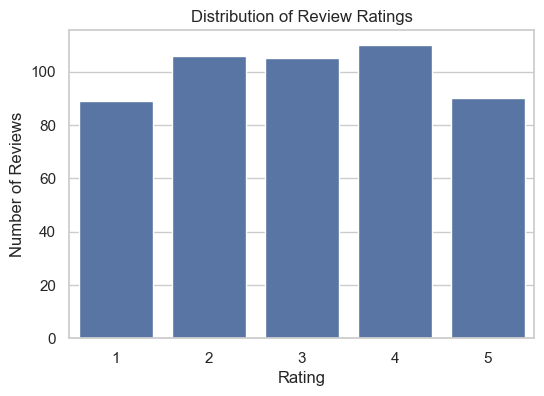

In [8]:
#What is the distribution of review ratings?

plt.figure(figsize=(6,4))
sns.countplot(x="rating", data=df)
plt.title("Distribution of Review Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()


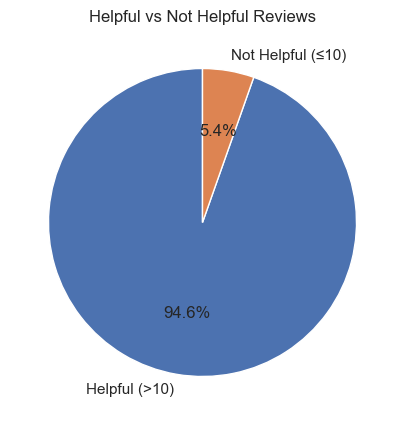

In [9]:
# How many reviews were marked as helpful?

df["helpful_flag"] = df["helpful_votes"].apply(
    lambda x: "Helpful (>10)" if x > 10 else "Not Helpful (≤10)"
)

plt.figure(figsize=(5,5))
df["helpful_flag"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Helpful vs Not Helpful Reviews")
plt.ylabel("")
plt.show()


In [10]:
# Common keywords in Positive vs Negative reviews

def top_words(sentiment, n=15):
    text = " ".join(df[df["sentiment"] == sentiment]["clean_review"])
    return Counter(text.split()).most_common(n)

pd.DataFrame(top_words("Positive"), columns=["Word", "Frequency"])


,Word,Frequency
0,and,150
1,app,85
2,very,78
3,highly,50
4,satisfied,50
5,the,50
6,works,50
7,exactly,50
8,as,50
9,expected,50


C:\Users\Akash Subramanian\AppData\Local\Temp\ipykernel_19936\2391917830.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors="coerce")


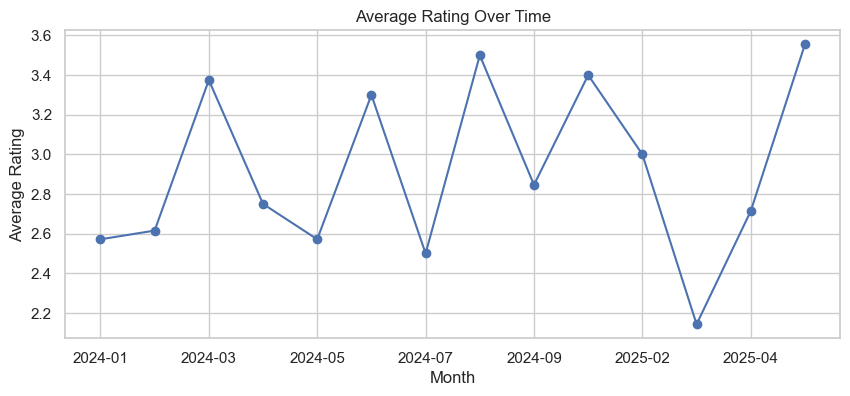

In [11]:
# How has the average rating changed over time?

df["date"] = pd.to_datetime(df["date"], errors="coerce")

avg_rating = df.groupby(df["date"].dt.to_period("M"))["rating"].mean()
avg_rating.index = avg_rating.index.astype(str)

plt.figure(figsize=(10,4))
avg_rating.plot(marker="o")
plt.title("Average Rating Over Time")
plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.show()



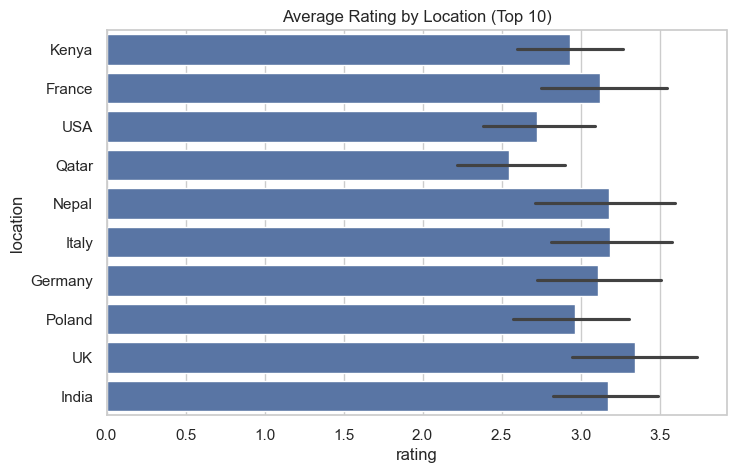

In [12]:
# How do ratings vary by user location?

top_locations = df["location"].value_counts().head(10).index

plt.figure(figsize=(8,5))
sns.barplot(
    y="location",
    x="rating",
    data=df[df["location"].isin(top_locations)],
    estimator="mean"
)
plt.title("Average Rating by Location (Top 10)")
plt.show()


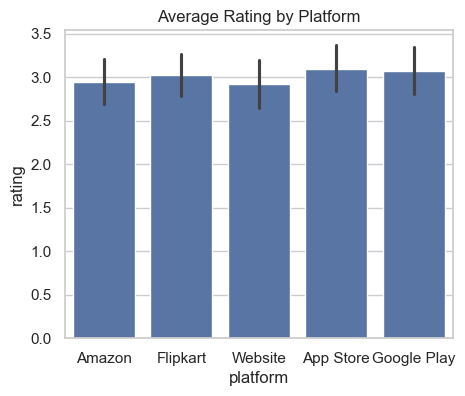

In [13]:
# Which platform gets better reviews? (Web vs Mobile)

plt.figure(figsize=(5,4))
sns.barplot(
    x="platform",
    y="rating",
    data=df,
    estimator="mean"
)
plt.title("Average Rating by Platform")
plt.show()


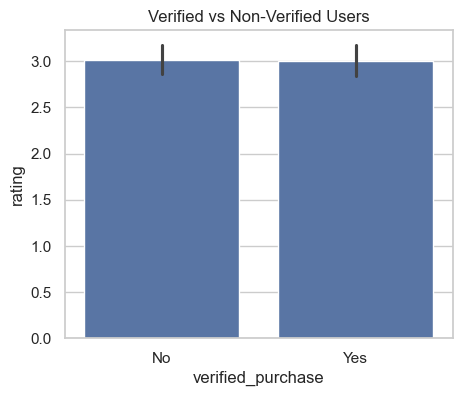

In [14]:
# Are verified users more satisfied?

plt.figure(figsize=(5,4))
sns.barplot(
    x="verified_purchase",
    y="rating",
    data=df,
    estimator="mean"
)
plt.title("Verified vs Non-Verified Users")
plt.show()


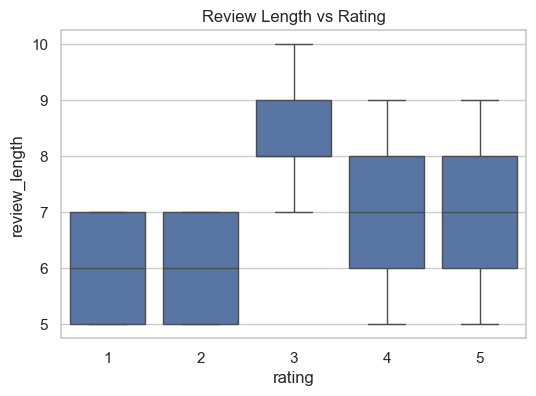

In [15]:
# Average review length per rating

df["review_length"] = df["clean_review"].apply(lambda x: len(x.split()))

plt.figure(figsize=(6,4))
sns.boxplot(x="rating", y="review_length", data=df)
plt.title("Review Length vs Rating")
plt.show()


In [16]:
# Most mentioned words in 1-star reviews

one_star_text = " ".join(df[df["rating"] == 1]["clean_review"])

common_1_star = Counter(one_star_text.split()).most_common(20)

pd.DataFrame(common_1_star, columns=["Word", "Frequency"])


,Word,Frequency
0,not,56
1,and,37
2,experience,33
3,poor,19
4,performance,19
5,userfriendly,19
6,terrible,19
7,needs,19
8,major,19
9,improvements,19


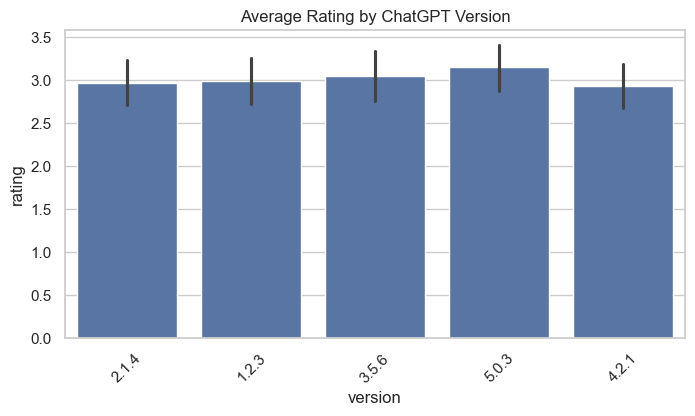

In [17]:
# Which ChatGPT version received the highest rating?

plt.figure(figsize=(8,4))
sns.barplot(
    x="version",
    y="rating",
    data=df,
    estimator="mean"
)
plt.xticks(rotation=45)
plt.title("Average Rating by ChatGPT Version")
plt.show()
